In [1]:
from QVM.qvm_circuit import *
from QVM.qvm_gate_walk import *
import matplotlib.pyplot as plt
import numpy as np

# Walk on Line

In [2]:
n = 100
dim = 1

In [3]:
circuit = Walk_Qubit(n, dim)
# circuit.print_state()

In [4]:
#100 iteration walk
quantum_walk_hadamard(circuit, 1, n)

In [5]:
proba = circuit.probabilities()
prob = np.zeros(2*(n+1)-1)
for i in range(0, 2*(n+1)-1):
    prob[i] = proba[i] + proba[i+2*(n+1)-1]

In [6]:
index = np.nonzero(prob)[0]
index

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200], dtype=int64)

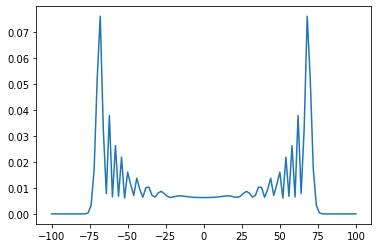

In [7]:
plt.plot(index-n, prob[index]) #non-zero probabilites

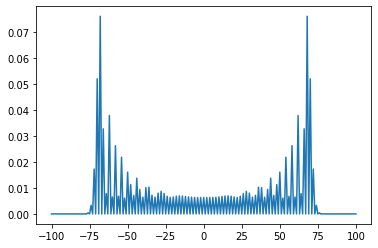

In [8]:
plt.plot(np.arange(len(prob))-n, prob) #include zero probabilites

# Walk on Lattices

In [9]:
n = 100
dim = 2

circuit = Walk_Qubit(n, dim)
quantum_walk_hadamard(circuit, 2, n)

In [10]:
proba = circuit.probabilities()
prob = np.zeros((2*(n+1)-1)**2)
for i in range(0, (2*(n+1)-1)**2):
    prob[i] = proba[i] + proba[i+(2*(n+1)-1)**2] + proba[i+2*(2*(n+1)-1)**2] + proba[i+3*(2*(n+1)-1)**2]

In [11]:
Z = np.reshape(prob, ((2*(n+1)-1), (2*(n+1)-1)))

In [12]:
np.max(Z)

0.005791050271775225

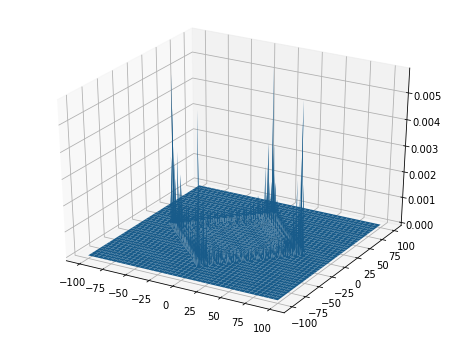

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0, (2*(n+1)-1))-n
Y = np.arange(0, (2*(n+1)-1))-n
X, Y = np.meshgrid(X.T, Y.T)
ax.plot_surface(X, Y, Z)
plt.show()